## Assignment
- Your task is to perform a multiple linear regression analysis to predict the price of Toyota corolla based on the given attributes.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
#importing libraries that we r gonna use

## Dataset Overview

In [2]:
df = pd.read_csv("ToyotaCorolla - MLR.csv") #Importing and storing our dataset as a dataframe

In [3]:
df.head() #Top 5 rows of the dataset

,Price,Age_08_04,KM,Fuel_Type,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
0,13500,23,46986,Diesel,90,0,2000,3,4,5,1165
1,13750,23,72937,Diesel,90,0,2000,3,4,5,1165
2,13950,24,41711,Diesel,90,0,2000,3,4,5,1165
3,14950,26,48000,Diesel,90,0,2000,3,4,5,1165
4,13750,30,38500,Diesel,90,0,2000,3,4,5,1170


In [4]:
df.tail() #Bottom 5 rows of the dataset

,Price,Age_08_04,KM,Fuel_Type,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
1431,7500,69,20544,Petrol,86,0,1300,3,4,5,1025
1432,10845,72,19000,Petrol,86,0,1300,3,4,5,1015
1433,8500,71,17016,Petrol,86,0,1300,3,4,5,1015
1434,7250,70,16916,Petrol,86,0,1300,3,4,5,1015
1435,6950,76,1,Petrol,110,0,1600,5,4,5,1114


#### Dataset Description:
- The dataset consists of the following variables:
- Age: Age in years
- KM: Accumulated Kilometers on odometer
- FuelType: Fuel Type (Petrol, Diesel, CNG)
- HP: Horse Power
- Automatic: Automatic ( (Yes=1, No=0)
- CC: Cylinder Volume in cubic centimeters
- Doors: Number of doors
- Weight: Weight in Kilograms
- Gears : Number of gears
- Cylinder : Number of cylinders
- Price: Offer Price in EUROs

In [5]:
df.shape #Dimension(rows x columns) of our dataset

(1436, 11)

In [6]:
df.info() #information about our dataset including null values , datatype , memory usage with number of rows and columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Price      1436 non-null   int64 
 1   Age_08_04  1436 non-null   int64 
 2   KM         1436 non-null   int64 
 3   Fuel_Type  1436 non-null   object
 4   HP         1436 non-null   int64 
 5   Automatic  1436 non-null   int64 
 6   cc         1436 non-null   int64 
 7   Doors      1436 non-null   int64 
 8   Cylinders  1436 non-null   int64 
 9   Gears      1436 non-null   int64 
 10  Weight     1436 non-null   int64 
dtypes: int64(10), object(1)
memory usage: 123.5+ KB


In [7]:
df.isnull().sum()

Price        0
Age_08_04    0
KM           0
Fuel_Type    0
HP           0
Automatic    0
cc           0
Doors        0
Cylinders    0
Gears        0
Weight       0
dtype: int64

In [8]:
df.duplicated().sum()

1

In [9]:
df = df.drop_duplicates()

In [10]:
df.duplicated().sum()

0

In [11]:
df.shape

(1435, 11)

In [12]:
df.dtypes

Price         int64
Age_08_04     int64
KM            int64
Fuel_Type    object
HP            int64
Automatic     int64
cc            int64
Doors         int64
Cylinders     int64
Gears         int64
Weight        int64
dtype: object

In [13]:
df['Fuel_Type'] = df['Fuel_Type'].astype('string')

In [14]:
df.dtypes

Price                 int64
Age_08_04             int64
KM                    int64
Fuel_Type    string[python]
HP                    int64
Automatic             int64
cc                    int64
Doors                 int64
Cylinders             int64
Gears                 int64
Weight                int64
dtype: object

In [15]:
df.rename(columns={'Age_08_04' : 'Age'} , inplace= True) # changing the column name of age

In [16]:
df.head()

,Price,Age,KM,Fuel_Type,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
0,13500,23,46986,Diesel,90,0,2000,3,4,5,1165
1,13750,23,72937,Diesel,90,0,2000,3,4,5,1165
2,13950,24,41711,Diesel,90,0,2000,3,4,5,1165
3,14950,26,48000,Diesel,90,0,2000,3,4,5,1165
4,13750,30,38500,Diesel,90,0,2000,3,4,5,1170


## EDA

In [17]:
for i in df.columns:
    print(df[i].value_counts())
#How many values are presentfor each column

Price
8950     109
9950      84
7950      63
10950     62
11950     47
        ... 
11790      1
4750       1
4350       1
21125      1
10845      1
Name: count, Length: 236, dtype: int64
Age
68    69
65    63
80    59
78    47
62    42
      ..
2      2
1      2
10     1
18     1
6      1
Name: count, Length: 77, dtype: int64
KM
36000    9
1        8
59000    7
43000    7
45000    6
        ..
63792    1
64193    1
65170    1
65471    1
16916    1
Name: count, Length: 1263, dtype: int64
Fuel_Type
Petrol    1264
Diesel     154
CNG         17
Name: count, dtype: Int64
HP
110    835
86     249
97     164
72      73
90      36
69      34
107     21
192     11
116      8
98       2
71       1
73       1
Name: count, dtype: int64
Automatic
0    1355
1      80
Name: count, dtype: int64
cc
1600     845
1300     248
1400     164
2000     118
1900      30
1800      14
1598       4
1587       4
1995       2
1398       2
1332       2
16000      1
1975       1
Name: count, dtype: int64
Doors
5    

##### Numerical Columns are : Price , Age , KM , HP , CC , Weight
##### Categorical Columns are : Fuel_Type , Automatic , Doors , Cylinders , Gears.

----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

### Univariate analysis on numerical columns

#### Price Column

- The avg price of the car is 10721.
- The min price is 4350.
- The max price is 32500.
- The car having price greater than 25000 are bought by people of age 4 which is not possible in real life.
- This column has no null values.
- The data is skewed.

In [18]:
df['Price'].describe()

count     1435.000000
mean     10720.915679
std       3608.732978
min       4350.000000
25%       8450.000000
50%       9900.000000
75%      11950.000000
max      32500.000000
Name: Price, dtype: float64

<Axes: ylabel='Frequency'>

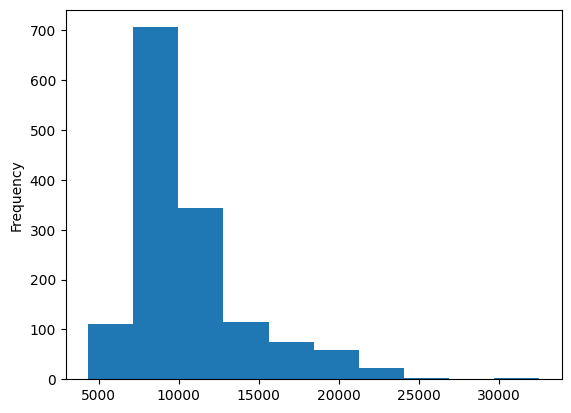

In [19]:
df['Price'].plot(kind = 'hist')

<Axes: ylabel='Density'>

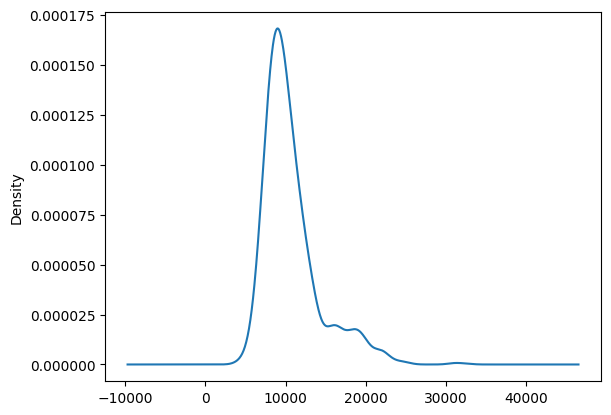

In [20]:
df['Price'].plot(kind = 'kde')

In [21]:
df.Price.skew()

1.6965785809803777

In [22]:
df.Price.isnull().sum()

0

<Axes: >

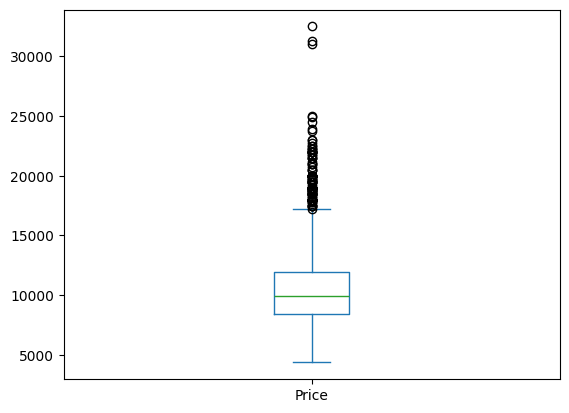

In [23]:
df['Price'].plot(kind ='box')

In [24]:
df[df['Price'] > 25000]

,Price,Age,KM,Fuel_Type,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
109,32500,4,1,Diesel,116,0,2000,5,4,5,1480
110,31000,4,4000,Diesel,116,0,2000,5,4,5,1480
111,31275,4,1500,Diesel,116,0,2000,5,4,5,1480


#### Age Column

- Minimum age is 1.
- Maximum age is 80.
- Mean age is 55.
- No null values
- Outliers have age less than 10
- Skewed data

In [25]:
df['Age'].describe()

count    1435.000000
mean       55.980488
std        18.563312
min         1.000000
25%        44.000000
50%        61.000000
75%        70.000000
max        80.000000
Name: Age, dtype: float64

<Axes: ylabel='Frequency'>

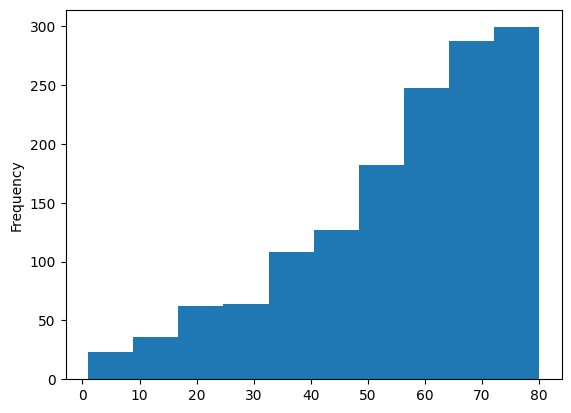

In [26]:
df['Age'].plot(kind ='hist')

<Axes: ylabel='Density'>

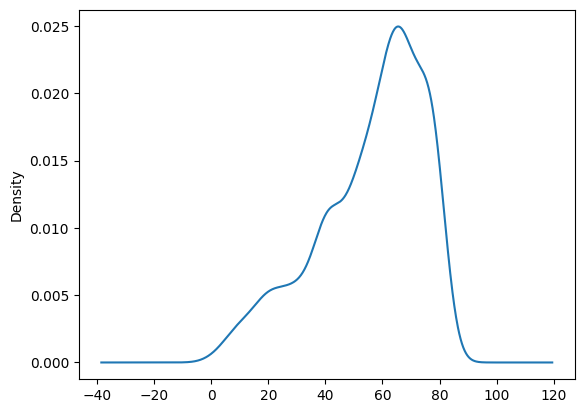

In [27]:
df['Age'].plot(kind ='kde')

In [28]:
df['Age'].skew()

-0.8255666018465969

In [29]:
df['KM'].describe()

count      1435.000000
mean      68571.782578
std       37491.094553
min           1.000000
25%       43000.000000
50%       63451.000000
75%       87041.500000
max      243000.000000
Name: KM, dtype: float64

<Axes: ylabel='Frequency'>

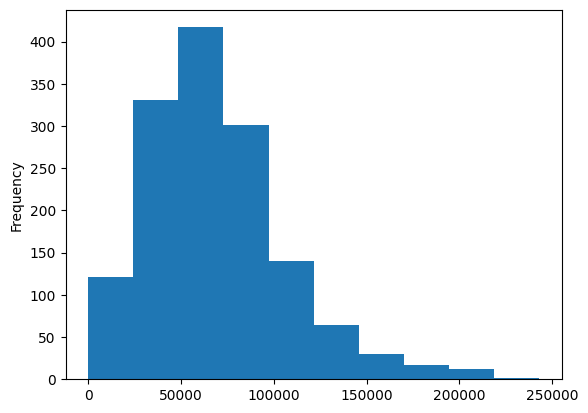

In [30]:
df['KM'].plot(kind ='hist')

<Axes: ylabel='Density'>

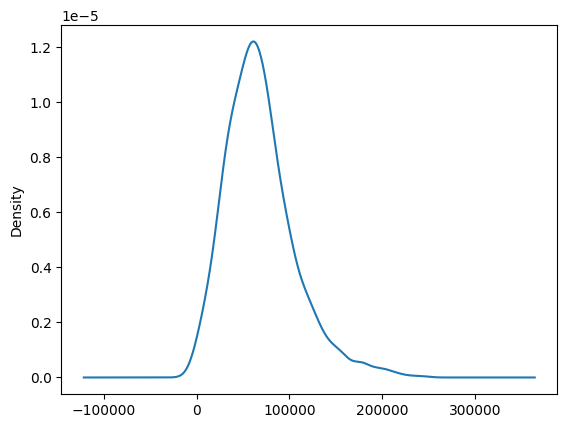

In [31]:
df['KM'].plot(kind ='kde')

In [32]:
df['Age'].skew()

-0.8255666018465969

In [33]:
df['Age'].isnull().sum()

0

<Axes: >

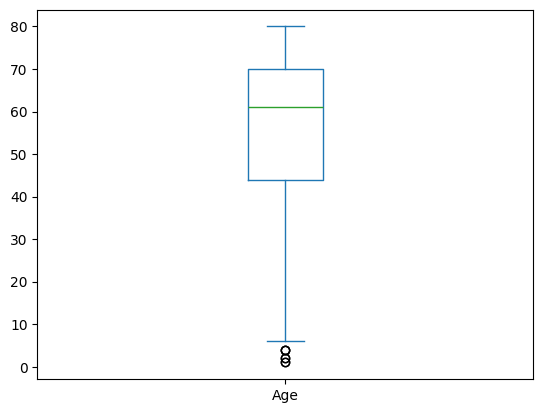

In [34]:
df['Age'].plot(kind = 'box')

In [35]:
df[df['Age'] < 11]

,Price,Age,KM,Fuel_Type,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
109,32500,4,1,Diesel,116,0,2000,5,4,5,1480
110,31000,4,4000,Diesel,116,0,2000,5,4,5,1480
111,31275,4,1500,Diesel,116,0,2000,5,4,5,1480
112,24950,8,13253,Diesel,116,0,2000,5,4,5,1320
114,22950,7,10000,Diesel,116,0,2000,5,4,5,1270
115,24990,8,6000,Diesel,90,0,2000,5,4,5,1280
116,21950,8,10841,Diesel,90,0,2000,5,4,5,1270
117,17900,7,1,Petrol,110,0,1600,3,4,5,1105
152,18450,10,13747,Petrol,97,0,1400,5,4,5,1110
162,19600,9,7650,Petrol,110,0,1600,5,4,5,1115


#### HP column

- Minimum horse power is 69.
- Maximum horse power is 192.
- Average Horse power is 101.
- We have 11 outliers which have horse power 192 and their weight is almost same and all uses petrol as their fuel.
- No null values.
- The data is skewed.

In [36]:
df['HP'].describe()

count    1435.000000
mean      101.491986
std        14.981408
min        69.000000
25%        90.000000
50%       110.000000
75%       110.000000
max       192.000000
Name: HP, dtype: float64

<Axes: ylabel='Frequency'>

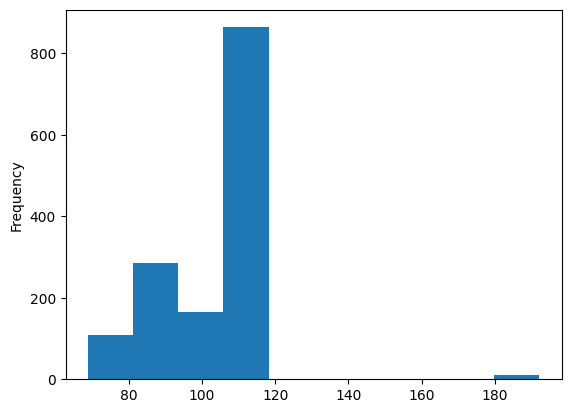

In [37]:
df['HP'].plot(kind ='hist')

<Axes: ylabel='Density'>

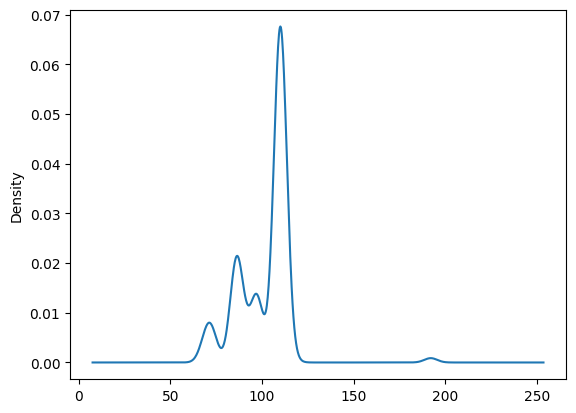

In [38]:
df['HP'].plot(kind ='kde')

In [39]:
df['HP'].skew()

0.9578333639343268

In [40]:
df.HP.skew()

0.9578333639343268

In [41]:
df.HP.isnull().sum()

0

<Axes: >

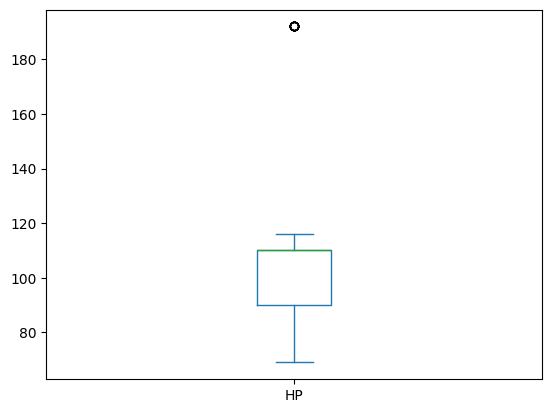

In [42]:
df.HP.plot(kind = 'box')

In [43]:
print(len(df[df.HP > 120]))
df[df.HP > 120]

11


,Price,Age,KM,Fuel_Type,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
8,21500,27,19700,Petrol,192,0,1800,3,4,5,1185
10,20950,25,31461,Petrol,192,0,1800,3,4,6,1185
11,19950,22,43610,Petrol,192,0,1800,3,4,6,1185
12,19600,25,32189,Petrol,192,0,1800,3,4,6,1185
13,21500,31,23000,Petrol,192,0,1800,3,4,6,1185
14,22500,32,34131,Petrol,192,0,1800,3,4,6,1185
15,22000,28,18739,Petrol,192,0,1800,3,4,6,1185
16,22750,30,34000,Petrol,192,0,1800,3,4,5,1185
49,21950,31,64982,Petrol,192,0,1800,5,4,6,1195
53,21950,27,49866,Petrol,192,0,1800,5,4,5,1195


#### CC Column

- Minimum cc is 1300.
- Maximum cc is 1600.
- Average cc is 1576.
- No null values.
- Highly skewed data.
- One outlier with cc 16000(bad for our model).

In [44]:
df['cc'].describe()

count     1435.000000
mean      1576.560976
std        424.387533
min       1300.000000
25%       1400.000000
50%       1600.000000
75%       1600.000000
max      16000.000000
Name: cc, dtype: float64

<Axes: ylabel='Frequency'>

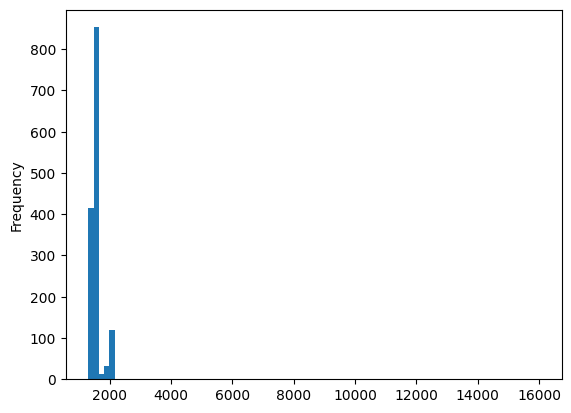

In [45]:
df['cc'].plot(kind ='hist' , bins = 85)

<Axes: ylabel='Density'>

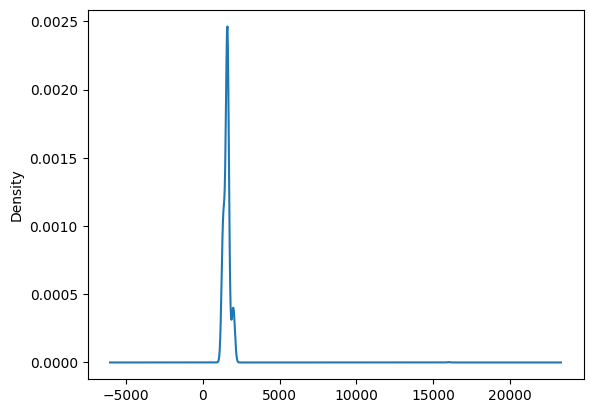

In [46]:
df['cc'].plot(kind ='kde')

<Axes: ylabel='Frequency'>

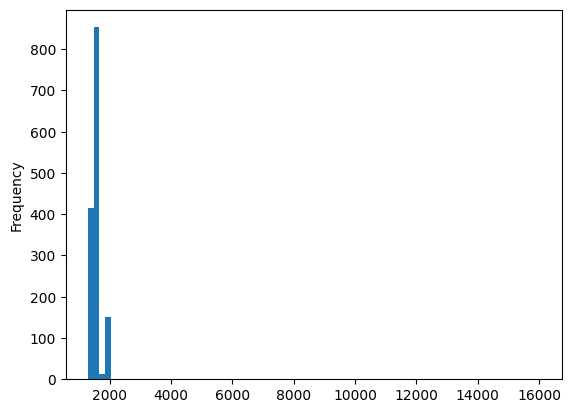

In [47]:
df['cc'].plot(kind ='hist', bins = 80)

In [48]:
df.cc.isnull().sum()

0

In [49]:
df.cc.skew()

27.45219619846663

<Axes: >

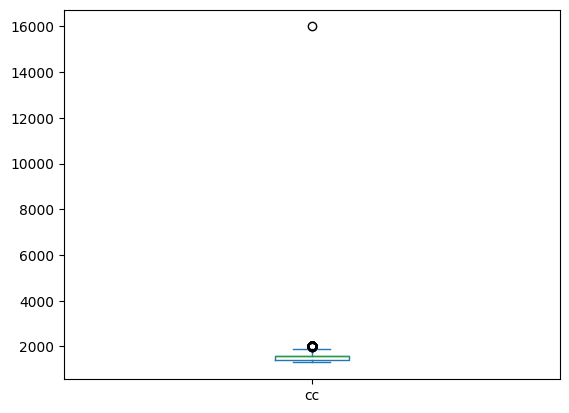

In [50]:
df.cc.plot(kind = 'box')

In [51]:
df[df['cc'] > 2000]

,Price,Age,KM,Fuel_Type,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
80,18950,25,20019,Petrol,110,1,16000,5,4,5,1180


In [52]:
df[df['cc'] > 2000]

,Price,Age,KM,Fuel_Type,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
80,18950,25,20019,Petrol,110,1,16000,5,4,5,1180


#### Weight Column

- Minimum weight is 1000.
- Maximum weight is 1615.
- Average Weight is 1072.
- The ouliers have weight greater than 1400
- No null values
- Skewed data

In [53]:
df['Weight'].describe()

count    1435.000000
mean     1072.287108
std        52.251882
min      1000.000000
25%      1040.000000
50%      1070.000000
75%      1085.000000
max      1615.000000
Name: Weight, dtype: float64

<Axes: ylabel='Frequency'>

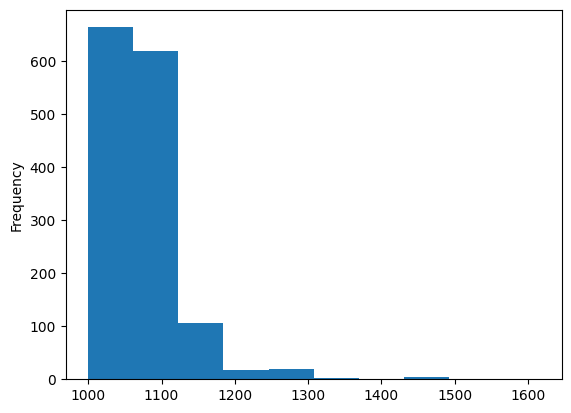

In [54]:
df['Weight'].plot(kind ='hist')

<Axes: ylabel='Density'>

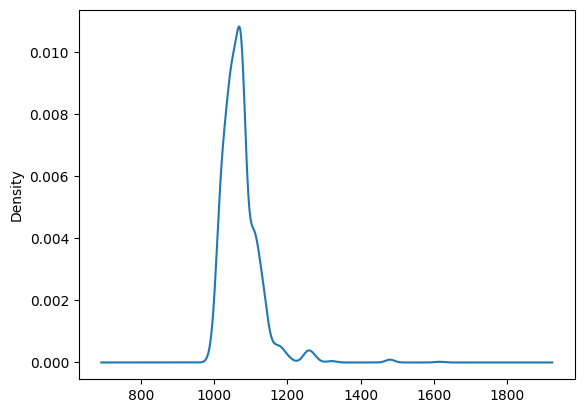

In [55]:
df['Weight'].plot(kind ='kde')

In [56]:
df['Weight'].skew()

3.1165183382777437

In [57]:
df['Weight'].isnull().sum()

0

<Axes: >

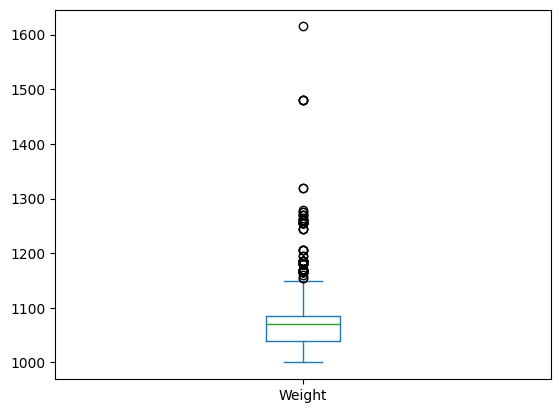

In [58]:
df['Weight'].plot(kind = 'box')

In [59]:
df[df['Weight'] > 1200].sort_values(by = ['Weight'])

,Price,Age,KM,Fuel_Type,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
211,14750,40,80425,Diesel,90,0,2000,5,4,5,1205
188,11950,40,179860,Diesel,90,0,2000,5,4,5,1205
268,14750,40,48952,Diesel,90,0,2000,5,4,5,1205
197,14750,39,108847,Diesel,90,0,2000,5,4,5,1205
87,17950,20,66966,Diesel,90,0,2000,3,4,5,1245
6,16900,27,94612,Diesel,90,0,2000,3,4,5,1245
7,18600,30,75889,Diesel,90,0,2000,3,4,5,1245
48,17950,22,72215,Diesel,90,0,2000,5,4,5,1255
50,17950,22,62636,Diesel,90,0,2000,5,4,5,1255
121,19950,19,51099,Diesel,90,0,2000,5,4,5,1255


### Univariate analysis on catgorical columns

In [60]:
##### Categorical Columns are : Fuel_Type , Automatic , Doors , Cylinders,Gears.

#### Fuel_Type column

- There are 3 fuel types
- Petrol , Diesel and CNG
- Petrol being the fuel type used by most cars and CNG being the least.
- 88% cars uses Petrol as their fuel.

In [61]:
df.Fuel_Type.value_counts()

Fuel_Type
Petrol    1264
Diesel     154
CNG         17
Name: count, dtype: Int64

<function matplotlib.pyplot.show(close=None, block=None)>

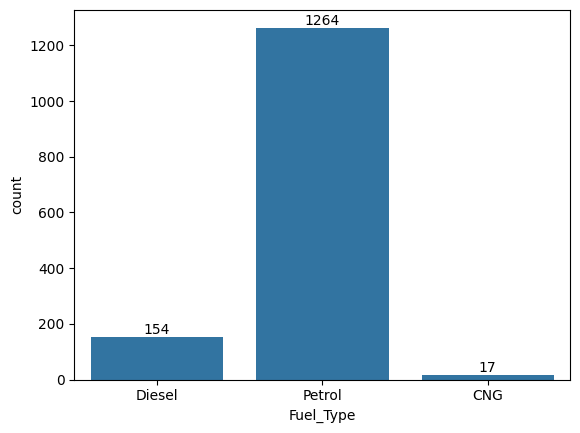

In [62]:
ax = sns.countplot(df , x = 'Fuel_Type')
for i in ax.containers:
    ax.bar_label(i)
plt.show

<Axes: ylabel='count'>

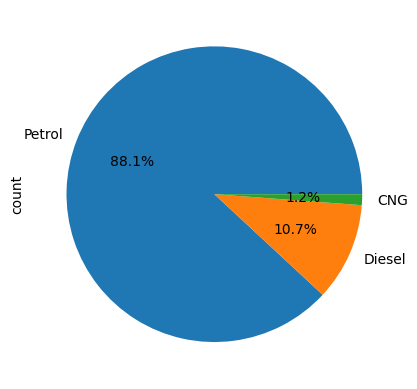

In [63]:
df['Fuel_Type'].value_counts().plot(kind = 'pie' , autopct = '%0.1f%%')

#### Automatic column

- Either the car is automatic or it is nit
- There are 1355 manual cars and 80 automatic cars
- Nearly 95% cars are manual

In [64]:
df.Automatic.value_counts()

Automatic
0    1355
1      80
Name: count, dtype: int64

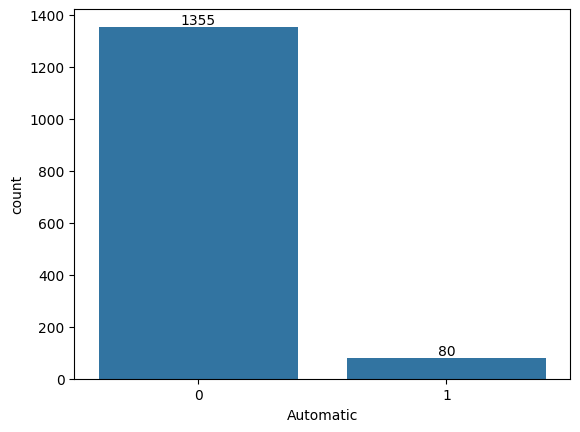

In [65]:
ax = sns.countplot(df , x = 'Automatic')
for i in ax.containers:
    ax.bar_label(i)

<Axes: ylabel='count'>

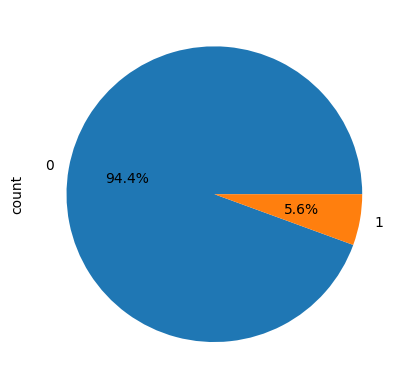

In [66]:
df['Automatic'].value_counts().plot(kind = 'pie' , autopct = '%0.1f%%')

#### Doors column

- The cars have either 5 doors , 3 doors , 4 doors or 2 doors.
- The cars with 5 doors are in a number of 673 and the cars with 3 doors are in a number of 622.
- Cars with 2 doors are in the least number.
- Cars with 5 and 3 doors are in a percentage of 46.9% and 43.3% respectively.

In [67]:
df.Doors.value_counts()

Doors
5    673
3    622
4    138
2      2
Name: count, dtype: int64

<Axes: ylabel='count'>

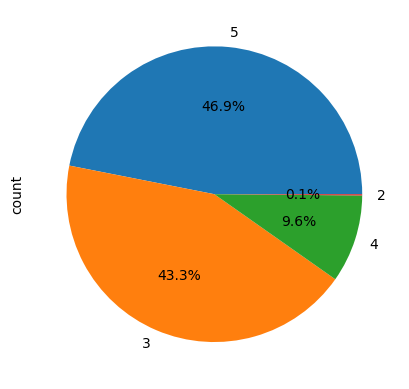

In [68]:
df['Doors'].value_counts().plot(kind = 'pie' , autopct = '%0.1f%%')

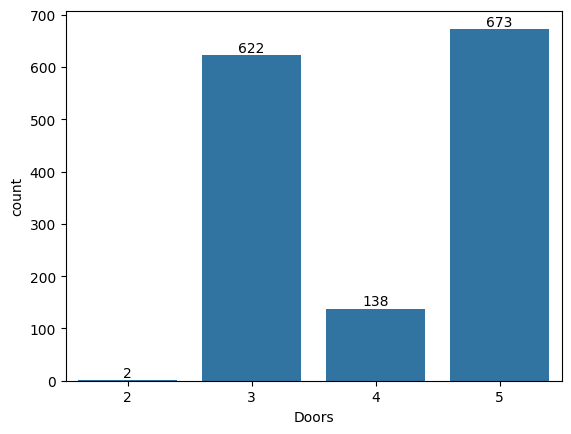

In [69]:
ax = sns.countplot(df , x = 'Doors')
for i in ax.containers:
    ax.bar_label(i)

#### Cylinders column

- All the cars have 4 cylinders .
- So it doesn't have that much of an impact while predicting the price of the Car.(Not good for our model.Just an extra feature which has 0 impact on the price o a car.)

In [70]:
df.Cylinders.value_counts()

Cylinders
4    1435
Name: count, dtype: int64

#### Gear column

- The number of cars with 5 gears is the highest with a number of 1389 and the number of cars with 4 gears are the lowest with the number of 1.
- Nearly 97% of cars have 5 gears.

In [71]:
df.Gears.value_counts()

Gears
5    1389
6      43
3       2
4       1
Name: count, dtype: int64

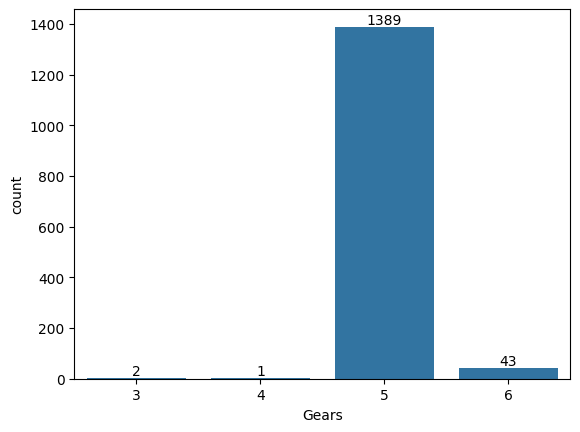

In [72]:
ax = sns.countplot(df , x = 'Gears')
for i in ax.containers:
    ax.bar_label(i)

<Axes: ylabel='count'>

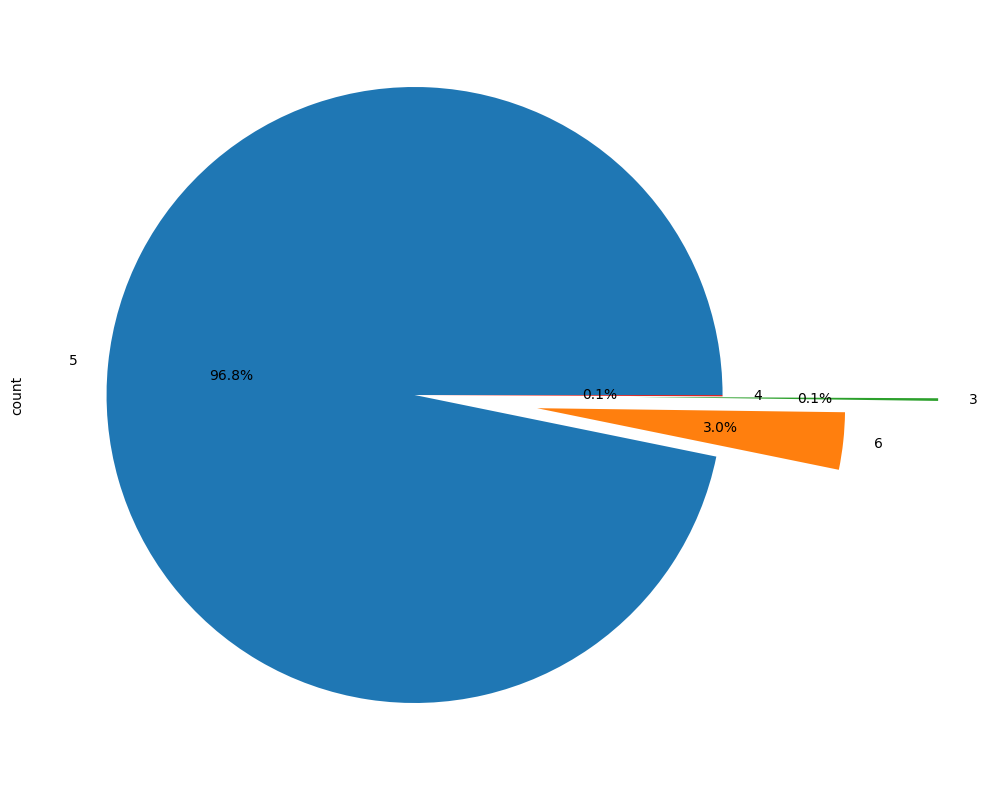

In [73]:
plt.figure(figsize=(10,10))
df['Gears'].value_counts().plot(kind = 'pie' , autopct = '%0.1f%%' , explode = [0 , 0.4 , 0.7 ,0])

|------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|

### Bivariate Analysis

#### Price VS KM

<Axes: xlabel='Price', ylabel='KM'>

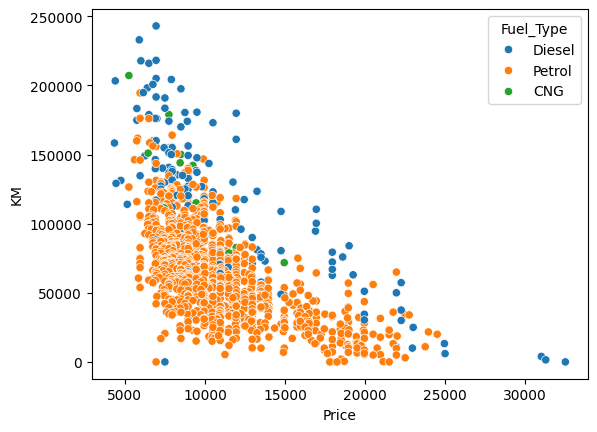

In [74]:
sns.scatterplot(data = df , x ='Price' , y = 'KM' , hue = 'Fuel_Type')

<Axes: xlabel='Age', ylabel='Price'>

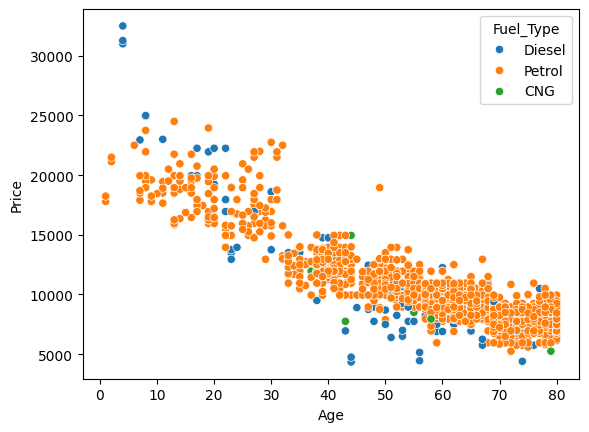

In [75]:
sns.scatterplot(data = df , x ='Age' , y = 'Price' , hue = 'Fuel_Type')

<Axes: xlabel='Age', ylabel='KM'>

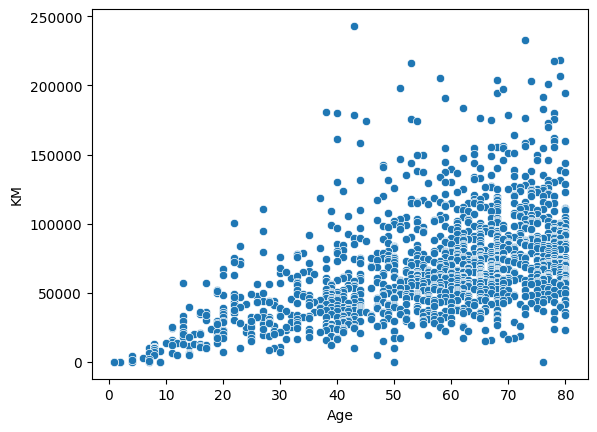

In [76]:
sns.scatterplot(data = df , x ='Age' , y = 'KM')

<Axes: xlabel='HP', ylabel='Price'>

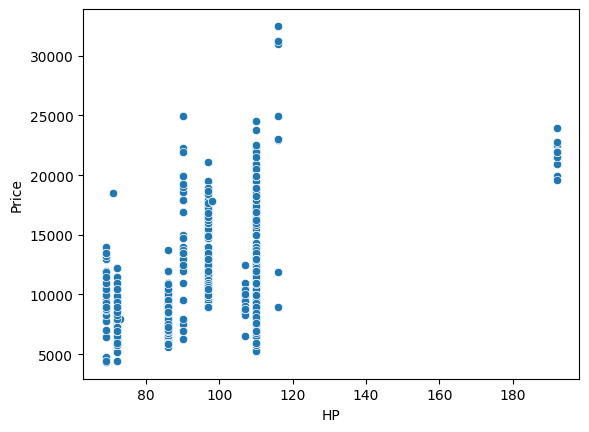

In [77]:
sns.scatterplot(df , x ='HP'  , y = 'Price')

<Axes: xlabel='cc', ylabel='Price'>

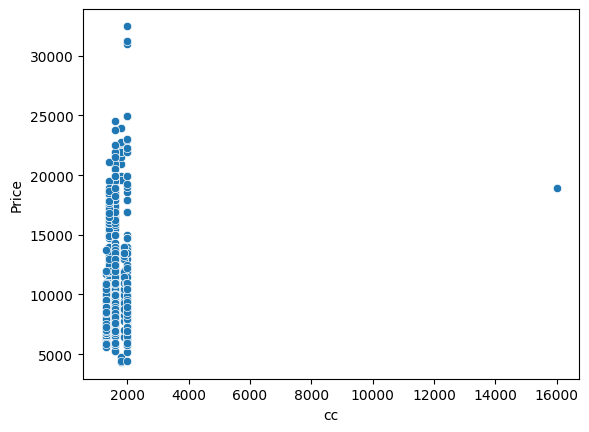

In [78]:
sns.scatterplot(df , x ='cc'  , y = 'Price')

<Axes: xlabel='Weight', ylabel='Price'>

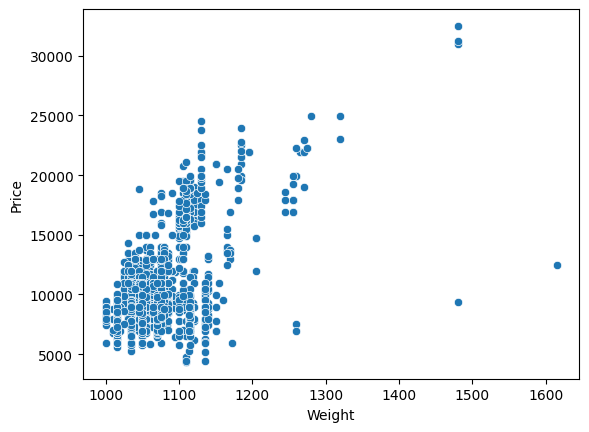

In [79]:
sns.scatterplot(df , x ='Weight'  , y = 'Price')

<Axes: xlabel='Gears', ylabel='Price'>

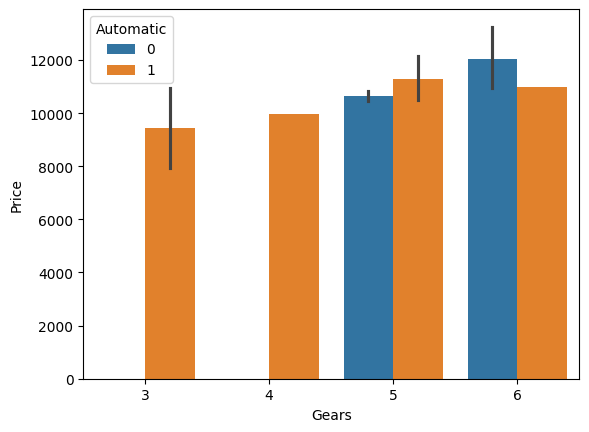

In [80]:
sns.barplot(df , x ='Gears'  , y = 'Price' , hue = 'Automatic')

In [81]:
df.columns

Index(['Price', 'Age', 'KM', 'Fuel_Type', 'HP', 'Automatic', 'cc', 'Doors',
       'Cylinders', 'Gears', 'Weight'],
      dtype='object')

<Axes: xlabel='Automatic', ylabel='Price'>

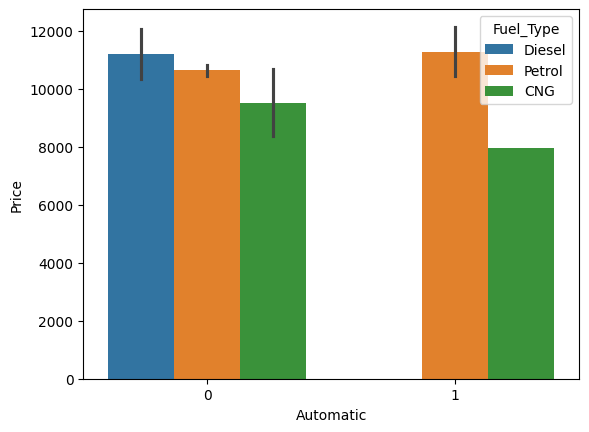

In [82]:
sns.barplot(df , x = 'Automatic', y = 'Price' , hue = 'Fuel_Type')

##### Very less number of cars are Automatic . Which means people very likely purchase cars which are not automatic.

<Axes: xlabel='Fuel_Type', ylabel='Price'>

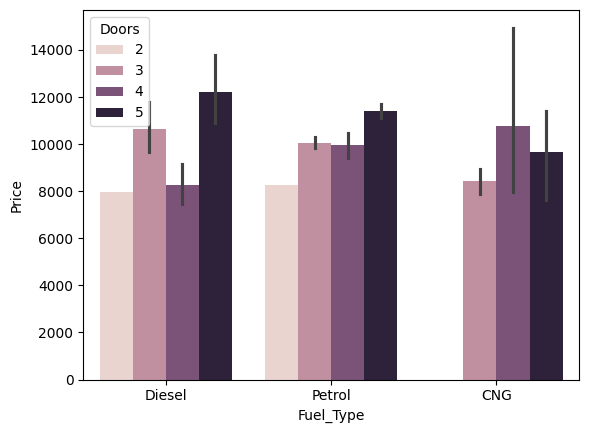

In [83]:
sns.barplot(df , y = 'Price' , x = 'Fuel_Type' , hue = 'Doors')

##### Cars running on diesel are the costiest.

##### U can see that cars running on has run for higher KMs.

##### Automatic cars are costier.

<Axes: xlabel='Fuel_Type', ylabel='cc'>

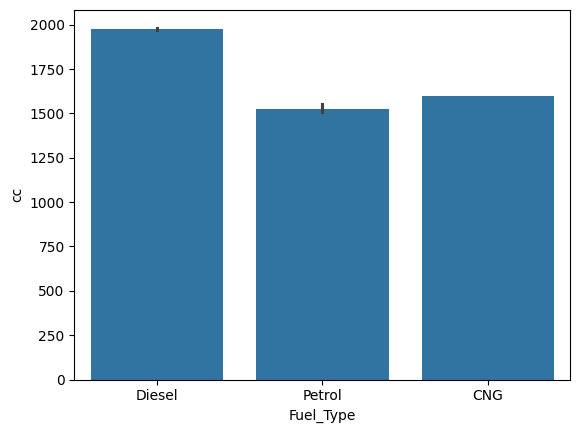

In [84]:
sns.barplot(df , x = 'Fuel_Type' , y = 'cc')

<Axes: xlabel='Doors', ylabel='Price'>

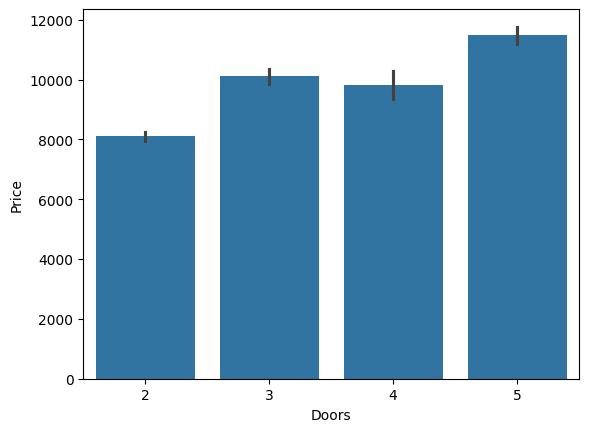

In [85]:
sns.barplot(df , x = 'Doors' , y = 'Price')

##### U can see here that cars with 2 doors are costier and cars with 2 doors are cheaper.

In [86]:
df.describe()

,Price,Age,KM,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
count,1435.000000,1435.000000,1435.000000,1435.000000,1435.000000,1435.000000,1435.000000,1435.0,1435.000000,1435.000000
mean,10720.915679,55.980488,68571.782578,101.491986,0.055749,1576.560976,4.032753,4.0,5.026481,1072.287108
std,3608.732978,18.563312,37491.094553,14.981408,0.229517,424.387533,0.952667,0.0,0.188575,52.251882
min,4350.000000,1.000000,1.000000,69.000000,0.000000,1300.000000,2.000000,4.0,3.000000,1000.000000
25%,8450.000000,44.000000,43000.000000,90.000000,0.000000,1400.000000,3.000000,4.0,5.000000,1040.000000
50%,9900.000000,61.000000,63451.000000,110.000000,0.000000,1600.000000,4.000000,4.0,5.000000,1070.000000
75%,11950.000000,70.000000,87041.500000,110.000000,0.000000,1600.000000,5.000000,4.0,5.000000,1085.000000
max,32500.000000,80.000000,243000.000000,192.000000,1.000000,16000.000000,5.000000,4.0,6.000000,1615.000000


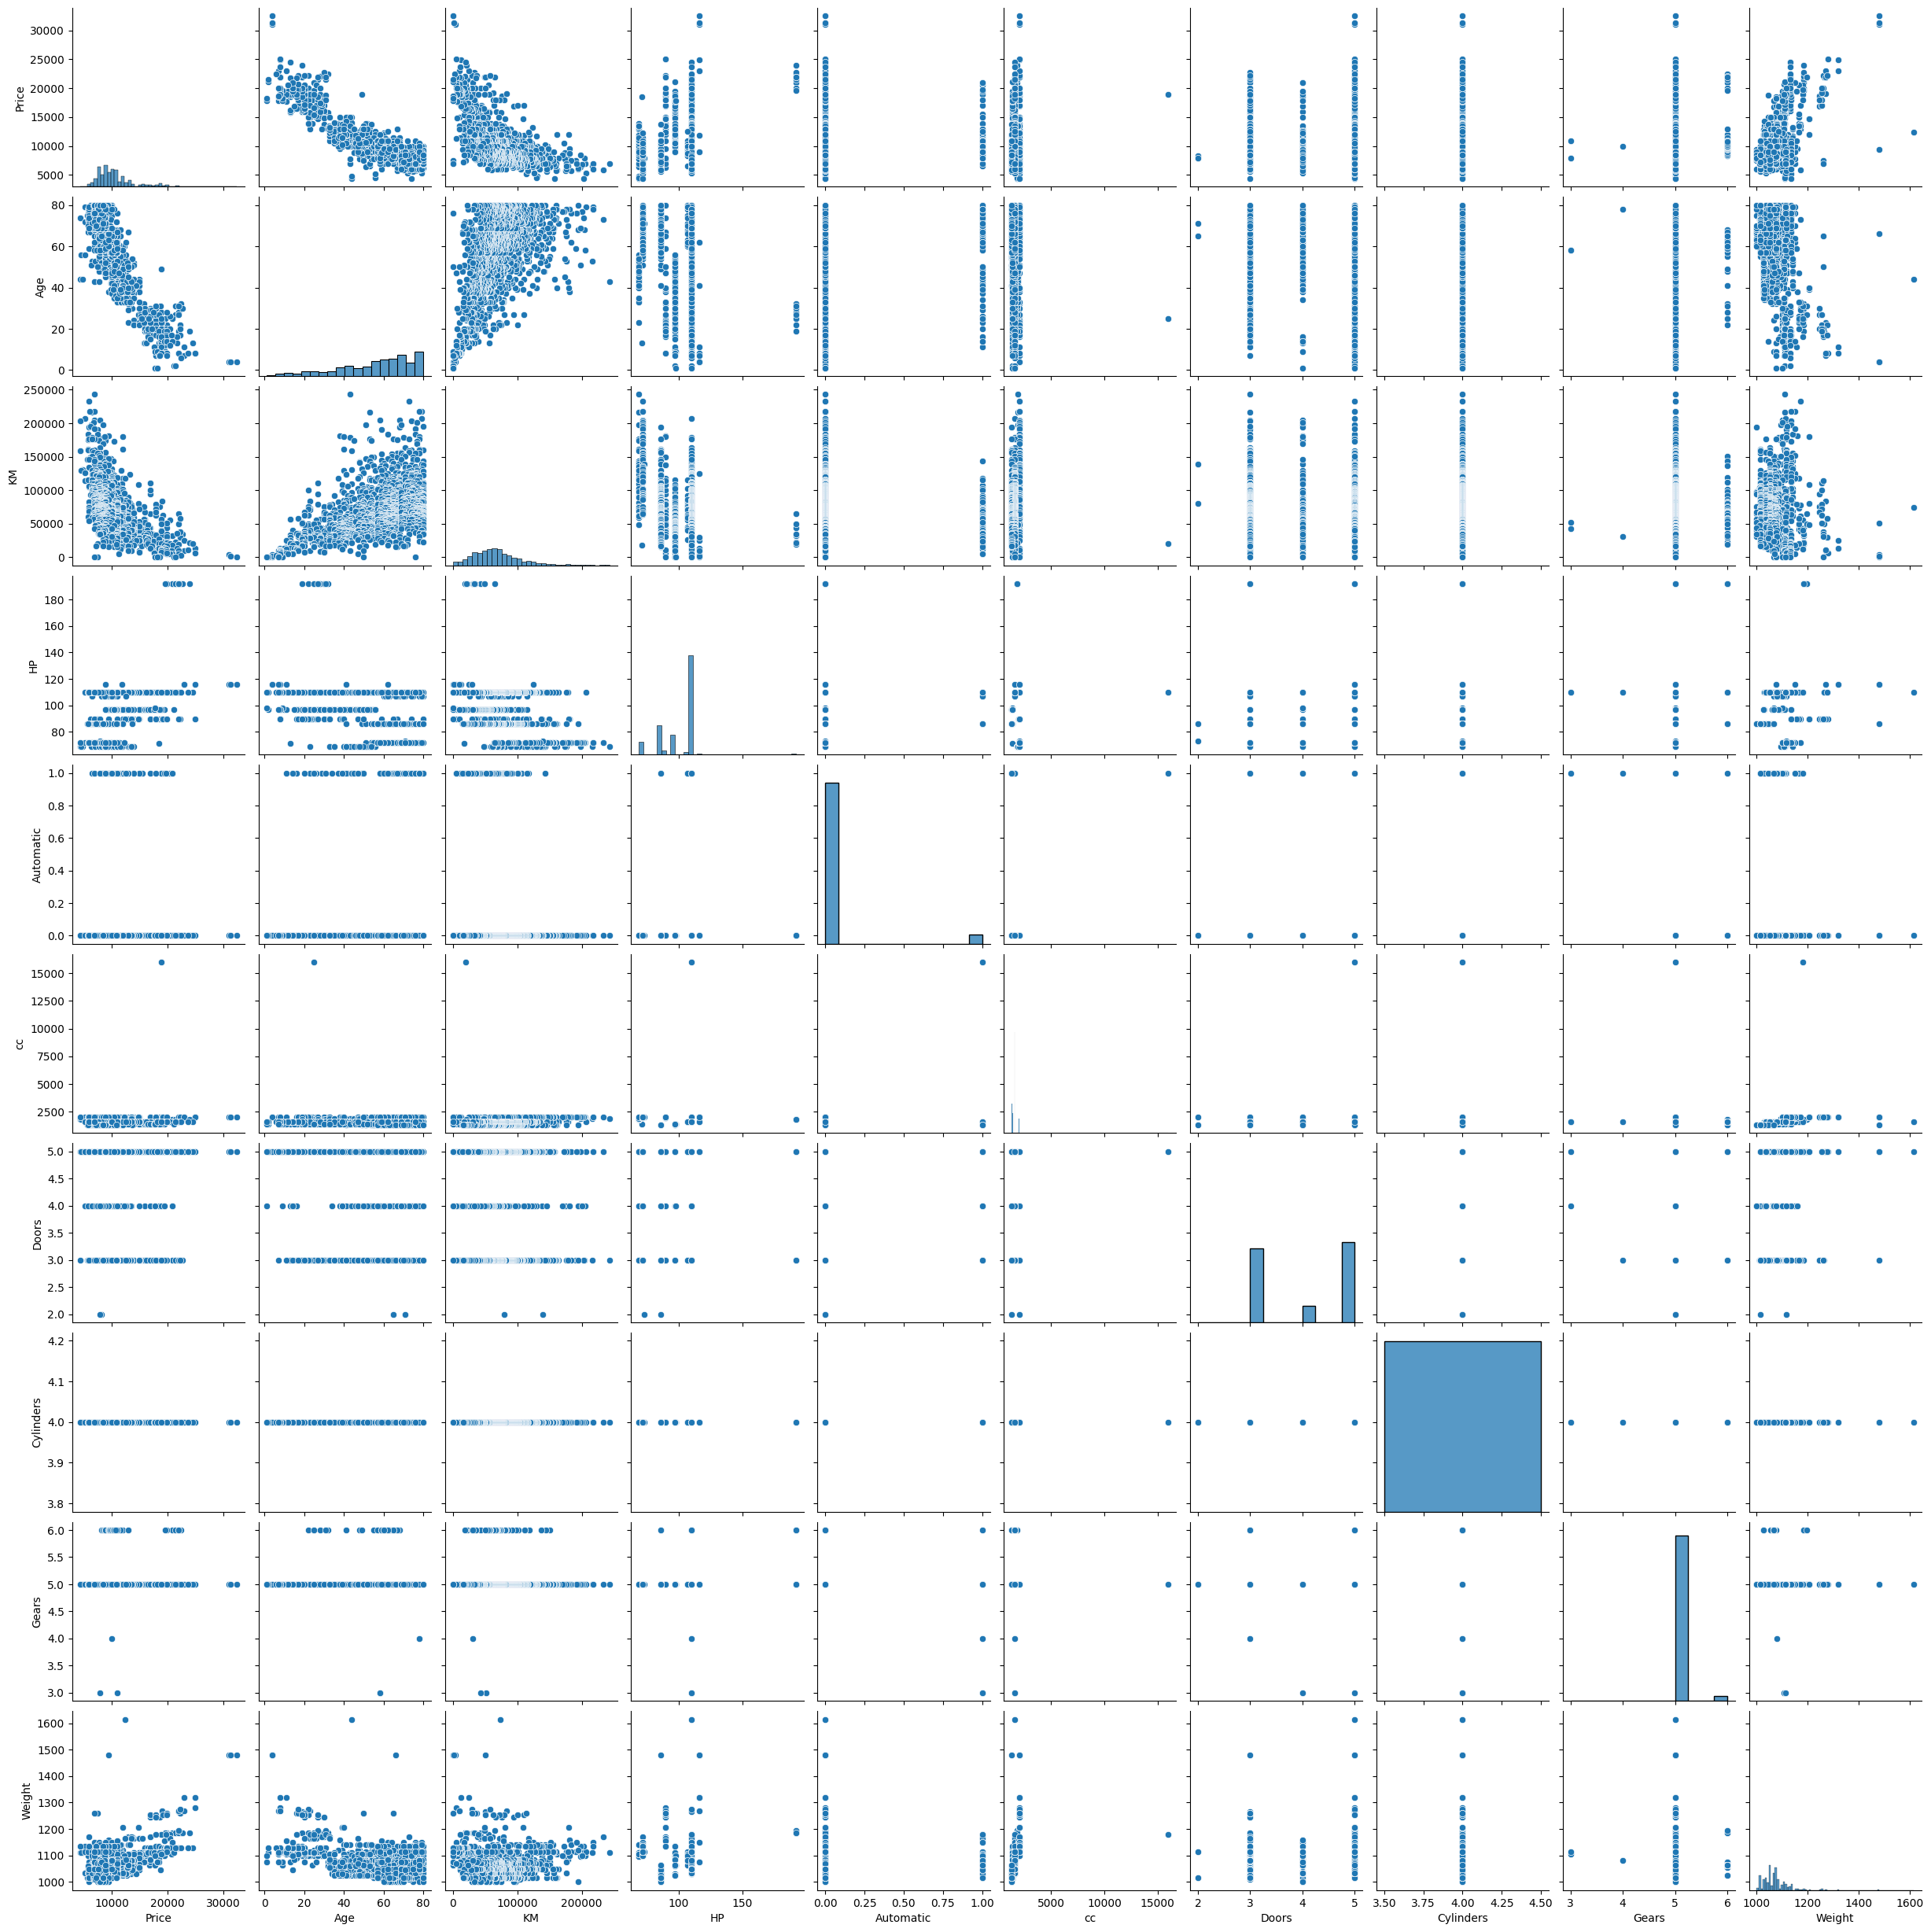

In [87]:
sns.pairplot(df)

<Axes: >

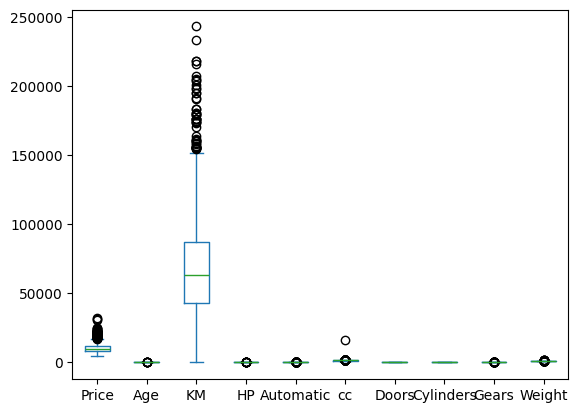

In [88]:
df.plot(kind = 'box')

In [89]:
new_df = df.drop(columns = 'Cylinders' , axis = 1)

In [90]:
new_df.columns

Index(['Price', 'Age', 'KM', 'Fuel_Type', 'HP', 'Automatic', 'cc', 'Doors',
       'Gears', 'Weight'],
      dtype='object')

In [91]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1435 entries, 0 to 1435
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Price      1435 non-null   int64 
 1   Age        1435 non-null   int64 
 2   KM         1435 non-null   int64 
 3   Fuel_Type  1435 non-null   string
 4   HP         1435 non-null   int64 
 5   Automatic  1435 non-null   int64 
 6   cc         1435 non-null   int64 
 7   Doors      1435 non-null   int64 
 8   Gears      1435 non-null   int64 
 9   Weight     1435 non-null   int64 
dtypes: int64(9), string(1)
memory usage: 123.3 KB


In [92]:
new_df['Fuel_Type'] = new_df['Fuel_Type'].map({'Petrol' : 3 , 'Diesel' : 2 , 'CNG' : 1})

In [93]:
new_df['Fuel_Type'].unique()

array([2, 3, 1], dtype=int64)

<Axes: xlabel='Fuel_Type', ylabel='count'>

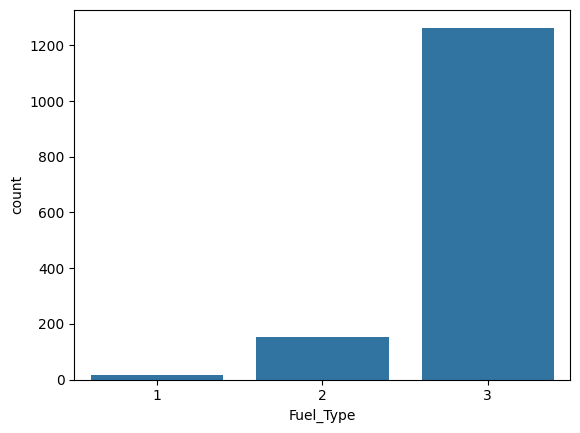

In [94]:
sns.countplot(new_df , x = 'Fuel_Type')

In [95]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1435 entries, 0 to 1435
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   Price      1435 non-null   int64
 1   Age        1435 non-null   int64
 2   KM         1435 non-null   int64
 3   Fuel_Type  1435 non-null   int64
 4   HP         1435 non-null   int64
 5   Automatic  1435 non-null   int64
 6   cc         1435 non-null   int64
 7   Doors      1435 non-null   int64
 8   Gears      1435 non-null   int64
 9   Weight     1435 non-null   int64
dtypes: int64(10)
memory usage: 123.3 KB


<Axes: >

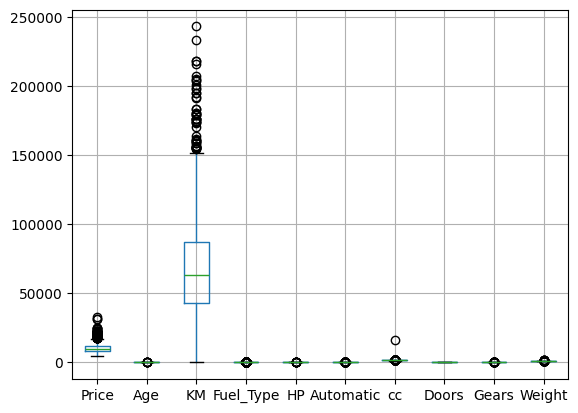

In [96]:
new_df.boxplot()

In [97]:
Q1 = np.quantile(new_df['KM'] , 0.25)
Q3 = np.quantile(new_df['KM'] , 0.75)
IQR = Q3 - Q1
Upper_limit = Q3 + 1.5 * IQR
Lower_limit = Q1 - 1.5 * IQR

In [98]:
Lower_limit ,Upper_limit

(-23062.25, 153103.75)

In [99]:
Outliers = []
for i in new_df['KM'] :
    if ((i > Upper_limit) or (i < Lower_limit)) :
        Outliers.append(i)
print(Outliers)
print(len(Outliers) , "is the number of outliers present in the KM column")

[243000, 180638, 179860, 178858, 161000, 158320, 216000, 198167, 176000, 174139, 174000, 205000, 204250, 194545, 190900, 183500, 176184, 174833, 155720, 155500, 154783, 154462, 232940, 218118, 217764, 207114, 203254, 200732, 197501, 194765, 191620, 183277, 180378, 178800, 176177, 176000, 172980, 170000, 164000, 161775, 160000, 159968, 159908, 158492, 156204, 156169, 155210, 155000, 154900]
49 is the number of outliers present in the KM column


In [100]:
Outliers.sort()
print(Outliers)

[154462, 154783, 154900, 155000, 155210, 155500, 155720, 156169, 156204, 158320, 158492, 159908, 159968, 160000, 161000, 161775, 164000, 170000, 172980, 174000, 174139, 174833, 176000, 176000, 176177, 176184, 178800, 178858, 179860, 180378, 180638, 183277, 183500, 190900, 191620, 194545, 194765, 197501, 198167, 200732, 203254, 204250, 205000, 207114, 216000, 217764, 218118, 232940, 243000]


In [101]:
new_df = new_df[new_df['KM'] < 220000]

In [102]:
new_df

,Price,Age,KM,Fuel_Type,HP,Automatic,cc,Doors,Gears,Weight
0,13500,23,46986,2,90,0,2000,3,5,1165
1,13750,23,72937,2,90,0,2000,3,5,1165
2,13950,24,41711,2,90,0,2000,3,5,1165
3,14950,26,48000,2,90,0,2000,3,5,1165
4,13750,30,38500,2,90,0,2000,3,5,1170
...,...,...,...,...,...,...,...,...,...,...
1431,7500,69,20544,3,86,0,1300,3,5,1025
1432,10845,72,19000,3,86,0,1300,3,5,1015
1433,8500,71,17016,3,86,0,1300,3,5,1015
1434,7250,70,16916,3,86,0,1300,3,5,1015


In [103]:
Outliers = []
for i in new_df['KM'] :
    if ((i > Upper_limit) or (i < Lower_limit)) :
        Outliers.append(i)
Outliers.sort()
print(Outliers)
print(len(Outliers) , "is the number of outliers present in the KM column")

[154462, 154783, 154900, 155000, 155210, 155500, 155720, 156169, 156204, 158320, 158492, 159908, 159968, 160000, 161000, 161775, 164000, 170000, 172980, 174000, 174139, 174833, 176000, 176000, 176177, 176184, 178800, 178858, 179860, 180378, 180638, 183277, 183500, 190900, 191620, 194545, 194765, 197501, 198167, 200732, 203254, 204250, 205000, 207114, 216000, 217764, 218118]
47 is the number of outliers present in the KM column


In [104]:
Q1 = np.quantile(new_df['cc'] , 0.25)
Q3 = np.quantile(new_df['cc'] , 0.75)
IQR = Q3 - Q1
Upper_limit = Q3 + 1.5 * IQR
Lower_limit = Q1 - 1.5 * IQR
Outliers = []
for i in new_df['cc'] :
    if ((i > Upper_limit) or (i < Lower_limit)) :
        Outliers.append(i)
Outliers.sort()
print(Outliers)
print(len(Outliers) , "is the number of outliers present in the cc column")

[1975, 1995, 1995, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 16000]
121 is the number of outliers present in the cc column


In [105]:
new_df = new_df[new_df['cc'] < 2100]

<Axes: >

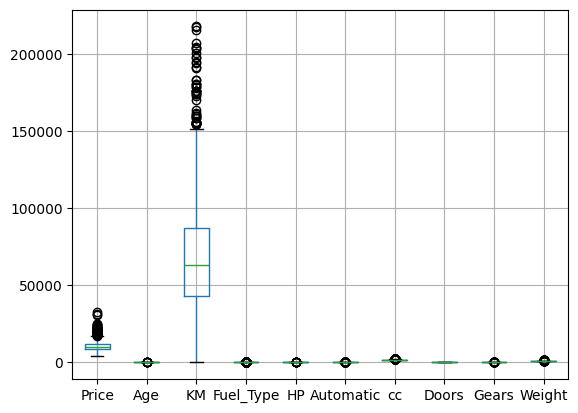

In [106]:
new_df.boxplot()

<Axes: >

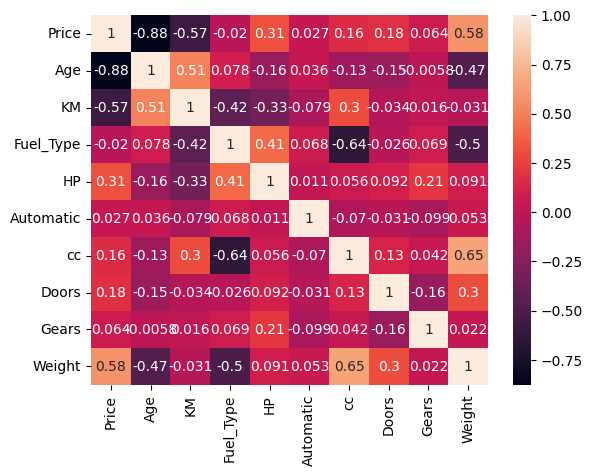

In [107]:
sns.heatmap(new_df.corr() , annot = True)

#### Weight - cc , Weight - HP has multicolinearity. This is bad for our model.Let's check if we have other multicolinear features.

In [108]:
from statsmodels.stats.outliers_influence import variance_inflation_factor #variance inflation factor to remove features with high variance

In [109]:
numerical_columns = new_df.drop(columns =['Fuel_Type' , 'Automatic' , 'Doors' , 'Gears' , 'Price'] , axis = 1)
vif_data = pd.DataFrame()
vif_data['Features'] = numerical_columns.columns
vif_data['Vif_score'] = [variance_inflation_factor(numerical_columns.values , i)
                        for i in range(len(numerical_columns.columns))] #vif score of all numerical features

In [110]:
vif_data

,Features,Vif_score
0,Age,13.324957
1,KM,8.264587
2,HP,51.758631
3,cc,135.548287
4,Weight,175.546305


In [111]:
numerical_columns = new_df.drop(columns =['Fuel_Type' , 'Automatic' , 'Doors' , 'Gears' , 'Price' , 'Weight'] , axis = 1)
vif_data = pd.DataFrame()
vif_data['Features'] = numerical_columns.columns
vif_data['Vif_score'] = [variance_inflation_factor(numerical_columns.values , i)
                        for i in range(len(numerical_columns.columns))] #vif score of all numerical features after removing 'Weight' feature

In [112]:
vif_data

,Features,Vif_score
0,Age,12.736653
1,KM,8.133399
2,HP,40.096717
3,cc,46.520998


In [113]:
numerical_columns = new_df.drop(columns =['Fuel_Type' , 'Automatic' , 'Doors' , 'Gears' , 'Price' , 'cc' , 'Weight'] , axis = 1)
vif_data = pd.DataFrame()
vif_data['Features'] = numerical_columns.columns
vif_data['Vif_score'] = [variance_inflation_factor(numerical_columns.values , i)
                        for i in range(len(numerical_columns.columns))] #vif score of all numerical features after removing 'cc' feature

In [114]:
vif_data

,Features,Vif_score
0,Age,12.661294
1,KM,5.910661
2,HP,7.618306


##### U can see how much the VIF has reduced after removing Weight and cc features.

##### Let's remove the 2 features from our dataframe.

In [115]:
new_df.columns

Index(['Price', 'Age', 'KM', 'Fuel_Type', 'HP', 'Automatic', 'cc', 'Doors',
       'Gears', 'Weight'],
      dtype='object')

In [116]:
new_df['Engine'] = new_df['cc'] + new_df['HP'] + new_df ['Fuel_Type'] + new_df['Gears'] #+new_df['Automatic']
new_df['Body'] = new_df['Doors'] + new_df['Weight']#Did not emove those columns , instead merged them with other columns to create new column
#new_df['Runtime'] = new_df['Age'] + new_df['KM']

C:\Users\achar\AppData\Local\Temp\ipykernel_18536\290995051.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['Engine'] = new_df['cc'] + new_df['HP'] + new_df ['Fuel_Type'] + new_df['Gears'] #+new_df['Automatic']
C:\Users\achar\AppData\Local\Temp\ipykernel_18536\290995051.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['Body'] = new_df['Doors'] + new_df['Weight']


In [117]:
new_df = new_df.drop(columns= ['Fuel_Type', 'HP', 'cc', 'Doors','Gears', 'Weight'] , axis = 1)

In [118]:
new_df

,Price,Age,KM,Automatic,Engine,Body
0,13500,23,46986,0,2097,1168
1,13750,23,72937,0,2097,1168
2,13950,24,41711,0,2097,1168
3,14950,26,48000,0,2097,1168
4,13750,30,38500,0,2097,1173
...,...,...,...,...,...,...
1431,7500,69,20544,0,1394,1028
1432,10845,72,19000,0,1394,1018
1433,8500,71,17016,0,1394,1018
1434,7250,70,16916,0,1394,1018


<Axes: >

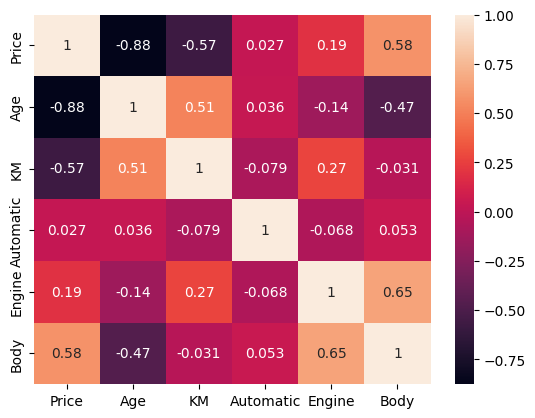

In [120]:
sns.heatmap(new_df.corr() , annot = True)

In [121]:
from sklearn.model_selection import train_test_split #Model creation

In [122]:
X = new_df.drop(columns = 'Price' , axis = 1)
y = new_df['Price']

In [123]:
X_train , X_test , y_train , y_test = train_test_split(X , y , test_size = 0.2 , random_state = 49)

In [124]:
X_train #train data

,Age,KM,Automatic,Engine,Body
1307,80,69904,0,1718,1075
176,8,7000,0,1718,1120
1129,71,107516,0,1718,1053
282,39,45713,0,1505,1090
332,38,32781,0,1718,1080
...,...,...,...,...,...
456,54,71725,0,1718,1039
911,64,58136,0,1718,1080
1210,73,87000,0,1394,1018
427,54,84598,0,1718,1080


In [125]:
y_train

1307     9950
176     18950
1129     7750
282     12850
332     11950
        ...  
456     10950
911      9950
1210     7950
427     12500
429     12950
Name: Price, Length: 1145, dtype: int64

In [126]:
print("shape of y_train is : ",X_train.shape)
print("shape of y_train is : ",y_train.shape)
print("shape of x_test is : ",X_test.shape)
print("shape of y_test is : ",y_test.shape)
#Checking the shape of datasets for training and testing

shape of y_train is :  (1145, 5)
shape of y_train is :  (1145,)
shape of x_test is :  (287, 5)
shape of y_test is :  (287,)


In [127]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
stdscaler = StandardScaler()
mmscaler = MinMaxScaler()

##### Doing feature scaling

In [128]:
stdscaler.fit(X_train)

StandardScaler()

In [129]:
X_train_stscaled = stdscaler.transform(X_train)

In [130]:
X_test_stdscaled = stdscaler.transform(X_test)

In [131]:
from sklearn.linear_model import LinearRegression

In [132]:
MLR = LinearRegression()

In [133]:
MLR.fit(X_train_stscaled , y_train)
y_pred = MLR.predict(X_test_stdscaled)
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error

In [134]:
r2_score(y_pred , y_test) #stdscaler

0.8350725052561807

In [135]:
mean_squared_error(y_pred , y_test)

1750257.1020236854

In [136]:
mean_absolute_error(y_pred , y_test)

976.1696403406053

In [137]:
mmscaler.fit(X_train)

MinMaxScaler()

In [138]:
X_train_mmscaled = mmscaler.transform(X_train)
X_test_mmscaled = mmscaler.transform(X_test)

In [139]:
MLR.fit(X_train_mmscaled , y_train)
y_pred2 = MLR.predict(X_test_mmscaled)

In [140]:
r2_score(y_pred2 , y_test) #minmaxscaler

0.8350725052561808

In [141]:
mean_squared_error(y_pred2 , y_test)

1750257.1020236851

In [142]:
mean_absolute_error(y_pred2 , y_test)

976.1696403406053

In [143]:
MLR.fit(X_train , y_train)
y_pred3 = MLR.predict(X_test)

In [144]:
r2_score(y_pred3 , y_test) #Without scaling

0.8350725052561796

In [145]:
mean_squared_error(y_pred3 , y_test)

1750257.1020236737

In [146]:
mean_absolute_error(y_pred3 , y_test)

976.1696403405994

##### The model without scaling the data works perfectly.

In [147]:
import pickle

In [148]:
pickle.dump( MLR ,open( "MLRASSIGNMENT1.pkl" , "wb"))#saving model
#pickle.dump( stdscaler ,open( "scalerassignment1.pkl" , "wb"))

In [149]:
prediction = pickle.load(open('MLRASSIGNMENT1.pkl' , "rb"))
#scaling = pickle.load(open('scalerassignment1.pkl' , "rb"))

In [150]:
new_df.sample()

,Price,Age,KM,Automatic,Engine,Body
359,14350,41,24475,0,1718,1035


In [153]:
data = np.array([[41,	24475,	0,	1718,	1035]])
#data_scaled = scaling.transform(data)

C:\Users\achar\anaconda3\envs\EXCELR\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [155]:
prediction.predict(data)#Prediction 1

C:\Users\achar\anaconda3\envs\EXCELR\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([12743.50372772])

In [156]:
new_df.sample() #prediction 2

,Price,Age,KM,Automatic,Engine,Body
824,6950,68,70000,0,1394,1018


In [158]:
data = np.array([[68	,70000	,0	,1394	,1018]])
#data_scaled = scaling.transform(data)
prediction.predict(data)

C:\Users\achar\anaconda3\envs\EXCELR\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([8176.75267658])